In [193]:
# Data Manipulation
import pandas as pd

# Operations
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt 

# Evaluation
import scipy.stats as stats
from sklearn import metrics

# Ignore Warnings
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

### Reading the Data

In [194]:
pd.set_option('max_columns',None)
pd.set_option('max_rows',81)

In [195]:
df_house = pd.read_csv('HousePrices.csv')
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Dictionary

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


# Preliminary Understanding of the Data

### Checking the Shape and Structure of Data

In [196]:
df_house.shape

(1460, 81)

In [197]:
df_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [198]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Checking the Categorical and Numerical Features

In [199]:
categorical_columns = df_house.select_dtypes('object').columns
numerical_columns = df_house.select_dtypes(np.number).columns

categorical_columns,numerical_columns

(Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition'],
       dtype='object'),
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 

Conversions to be made:    
    
    MSSubClass - Categorical
    MoSold - Categorical {Jan,Feb,Mar,Apr....}

No Need to Convert here and they could be considered as numerical as well
    
    OverallQual - Categorical/Numerical [1-10]
    OverallCond - Categorical/Numerical [1-10]

In [200]:
Months = {1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun',
          7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}
df_house['Month_Sold'] = df_house.MoSold.map(Months)
df_house.MSSubClass = df_house.MSSubClass.astype('object')

In [201]:
# Drop ID as it gives no Information towards my objective
df_house.drop('Id',axis=1,inplace=True)

# Cleaning & Exploratory Data Analysis

### Checking Percentage of Missing Values

In [202]:
miss = df_house.isnull().sum()/df_house.shape[0]*100
miss[miss>0].sort_values(ascending = False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [203]:
# NA in Pool Quality means No Pool --> convert the NA to NP
df_house['PoolQC'].fillna('No Pool',inplace=True)

# NA in Misc Feature means None --> convert the NA to None
df_house['MiscFeature'].fillna('None',inplace=True)

# NA in Alley means No Alley --> convert the NA to No Alley
df_house['Alley'].fillna('No Alley',inplace=True)

# NA in Fence means No Fence --> convert the NA to No Fence
df_house['Fence'].fillna('No Fence',inplace=True)

In [204]:
miss = df_house.isnull().sum()/df_house.shape[0]*100
miss[miss>0].sort_values(ascending = False)

FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [205]:
# Where Fire Places are 0, the FireplacesQu is Nan
df_house[(df_house['Fireplaces']==0) & df_house['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


In [206]:
df_house['FireplaceQu'].fillna('No Fireplace',inplace=True)

In [207]:
(df_house.isnull().sum()/df_house.shape[0]*100).sort_values(ascending=False).head(17)

LotFrontage     17.739726
GarageFinish     5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageQual       5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
BsmtFinSF1       0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
dtype: float64

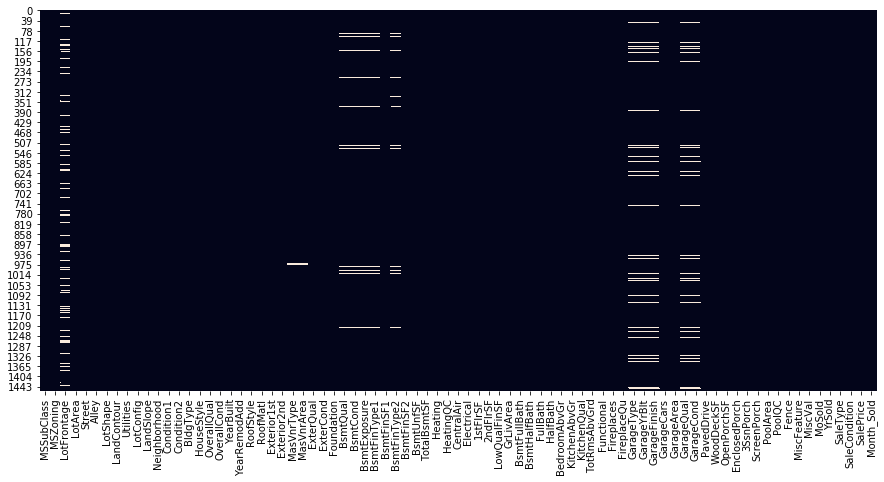

In [208]:
plt.figure(figsize=(15,7))
sns.heatmap(df_house.isnull(),cbar=False)
plt.show()

    --The Null Values in Garage Related Columns are same for all columns. 
    --The Null Values in Basement Related Columns are same for all columns. 

In [209]:
# NA in Garage Condition,Quality,Finish,Type means No Garage --> convert the NA to No Garage
df_house['GarageCond'].fillna('No Garage',inplace=True)
df_house['GarageFinish'].fillna('No Garage',inplace=True)
df_house['GarageQual'].fillna('No Garage',inplace=True)
df_house['GarageType'].fillna('No Garage',inplace=True)

# NA in Basement Condition,Quality,FinType1,FinType2,Exposure means No Basement --> convert the NA to No Basement
df_house['BsmtCond'].fillna('No Basement',inplace=True)
df_house['BsmtQual'].fillna('No Basement',inplace=True)
df_house['BsmtFinType1'].fillna('No Basement',inplace=True)
df_house['BsmtFinType2'].fillna('No Basement',inplace=True)
df_house['BsmtExposure'].fillna('No Basement',inplace=True)

# NA in MasVnrArea MasVnrType means None --> convert the NA to None
df_house['MasVnrArea'].fillna(0,inplace=True)
df_house['MasVnrType'].fillna('None',inplace=True)

In [210]:
(df_house.isnull().sum()/df_house.shape[0]*100).sort_values(ascending=False).head(6)

LotFrontage    17.739726
GarageYrBlt     5.547945
Electrical      0.068493
Foundation      0.000000
RoofMatl        0.000000
Exterior1st     0.000000
dtype: float64

In [211]:
# Handling Electrical Null Values --> Using Mode (SBrkr is Mode)
df_house['Electrical'].fillna('SBrkr',inplace=True)

In [212]:
(df_house.isnull().sum()/df_house.shape[0]*100).sort_values(ascending=False).head(6)

LotFrontage    17.739726
GarageYrBlt     5.547945
BsmtQual        0.000000
RoofMatl        0.000000
Exterior1st     0.000000
Exterior2nd     0.000000
dtype: float64

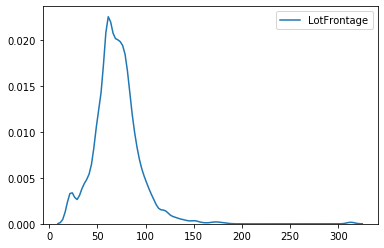

In [213]:
# Handling Missing Values in Lot Frontage
sns.kdeplot(df_house['LotFrontage'])

In [214]:
df_house.groupby(['MSZoning','Alley','Street'])['LotFrontage'].quantile(0.5)

MSZoning  Alley     Street
C (all)   No Alley  Grvl       93.0
                    Pave       60.0
          Pave      Pave       58.0
FV        No Alley  Pave       75.0
          Pave      Pave       34.5
RH        No Alley  Pave       60.0
          Pave      Pave       57.5
RL        Grvl      Pave       60.0
          No Alley  Grvl       65.5
                    Pave       73.0
          Pave      Pave       60.0
RM        Grvl      Pave       60.0
          No Alley  Grvl      110.0
                    Pave       50.0
          Pave      Pave       60.0
Name: LotFrontage, dtype: float64

In [215]:
pd.pivot_table(df_house,index=['MSZoning','Neighborhood','Street'],values=['LotFrontage'],aggfunc=[np.mean,np.median,len])

mean      median         len
                             LotFrontage LotFrontage LotFrontage
MSZoning Neighborhood Street                                    
C (all)  IDOTRR       Grvl     93.000000        93.0         2.0
                      Pave     64.428571        60.0         7.0
         OldTown      Pave     60.000000        60.0         1.0
FV       Somerst      Pave     59.491228        65.0        65.0
RH       Crawfor      Pave     82.000000        82.0         2.0
         Edwards      Pave     62.000000        62.0         2.0
         NAmes        Pave     34.000000        34.0         2.0
         SWISU        Pave     56.666667        55.0         5.0
         SawyerW      Pave     60.000000        60.0         5.0
RL       Blmngtn      Pave     47.142857        43.0        16.0
         BrkSide      Pave     64.000000        58.0        28.0
         ClearCr      Pave     83.461538        80.0        28.0
         CollgCr      Pave     72.536585        70.0       140.0
         Crawfor      Pave     73.000000        74.5        46.0
         Edwards      Grvl     81.000000        81.0         1.0
                      Pave     71.382716        67.0        89.0
         Gilbert      Pave     79.877551        65.0        79.0
         Mitchel      Pave     73.406250        75.0        44.0
         NAmes        Pave     76.923913        73.0       223.0
         NPkVill      Pave     32.285714        24.0         9.0
         NWAmes       Pave     81.288889        80.0        73.0
         NoRidge      Pave     91.878788        91.0        41.0
         NridgHt      Pave     82.186667        90.0        76.0
         OldTown      Pave     65.176471        60.0        17.0
         SWISU        Pave     59.250000        60.0        20.0
         Sawyer       Pave     74.673913        71.5        72.0
         SawyerW      Pave     72.500000        70.0        54.0
         Somerst      Pave     78.714286        78.0        21.0
         StoneBr      Pave     62.700000        61.5        25.0
         Timber       Grvl     50.000000        50.0         2.0
                      Pave     81.172414        85.0        36.0
         Veenker      Pave     59.714286        68.0        11.0
RM       Blmngtn      Pave           NaN         NaN         1.0
         Blueste      Pave     24.000000        24.0         2.0
         BrDale       Pave     21.562500        21.0        16.0
         BrkSide      Pave     52.586207        51.0        30.0
         CollgCr      Pave     36.666667        37.0        10.0
         Crawfor      Pave     50.666667        44.0         3.0
         Edwards      Pave     36.125000        33.5         8.0
         IDOTRR       Grvl    110.000000       110.0         1.0
                      Pave     57.416667        59.5        27.0
         MeadowV      Pave     27.800000        21.0        17.0
         Mitchel      Pave     43.500000        32.0         5.0
         NridgHt      Pave     59.000000        59.0         1.0
         OldTown      Pave     62.373626        60.0        95.0
         Sawyer       Pave     69.000000        69.0         2.0

In [216]:
# Checking the LotFrontage Missing Values and seeing the distribution
temp_lotfrontage = df_house[df_house['LotFrontage'].isnull()]
pd.pivot_table(temp_lotfrontage,index=['Street'],values=['LotFrontage'],aggfunc=[np.mean,np.median,len])

,len
,LotFrontage
Grvl,1.0
Pave,258.0


In [217]:
pd.pivot_table(temp_lotfrontage,index=['MSZoning','Neighborhood','Street'],values=['LotFrontage'],aggfunc=[np.mean,np.median,len])

len
                             LotFrontage
MSZoning Neighborhood Street            
FV       Somerst      Pave           8.0
RH       SWISU        Pave           2.0
         SawyerW      Pave           1.0
RL       Blmngtn      Pave           2.0
         BrkSide      Pave           6.0
         ClearCr      Pave          15.0
         CollgCr      Pave          17.0
         Crawfor      Pave          10.0
         Edwards      Pave           8.0
         Gilbert      Pave          30.0
         Mitchel      Pave          12.0
         NAmes        Pave          39.0
         NPkVill      Pave           2.0
         NWAmes       Pave          28.0
         NoRidge      Pave           8.0
         NridgHt      Pave           1.0
         Sawyer       Pave          26.0
         SawyerW      Pave           8.0
         StoneBr      Pave           5.0
         Timber       Grvl           1.0
                      Pave           7.0
         Veenker      Pave           4.0
RM       Blmngtn      Pave           1.0
         BrkSide      Pave           1.0
         CollgCr      Pave           7.0
         IDOTRR       Pave           3.0
         MeadowV      Pave           2.0
         Mitchel      Pave           1.0
         OldTown      Pave           4.0

In [218]:
pd.pivot_table(temp_lotfrontage,index=['MSZoning','Street','LotConfig'],values=['LotFrontage'],aggfunc=[np.mean,np.median,len])

len
                          LotFrontage
MSZoning Street LotConfig            
FV       Pave   FR2               2.0
                Inside            6.0
RH       Pave   Inside            3.0
RL       Grvl   Corner            1.0
         Pave   Corner           59.0
                CulDSac          49.0
                FR2              11.0
                Inside          109.0
RM       Pave   Corner            2.0
                FR2               1.0
                Inside           16.0

#### Approach for LotFrontage

    -- Take out Sale Price
    -- Remove Empty LotFrontage Variables --> Consider it to be final Test Set
    -- Based on the remaining Dataset, build a model to regress on LotFrontage after doing an Outlier Analysis
    -- Then Predict the LotFrontage for the Test Set on maximum possible Accuracy
    
* **This approach is done post Feature Engineering**

------------------------------

## Feature Engineering to be done : 

    # Calculate Age of Building(sold-built dates)
    # Check whether House was Remodelled
    # Provided house is remodelled, check Recency of Remodelling (sold-remod dates)

### Sanity Checks

In [219]:
print('YearBuilt > YearSold :',df_house[df_house['YearBuilt']>df_house['YrSold']].shape[0])
print('YearRemodelled > YearSold :',df_house[df_house['YearRemodAdd']>df_house['YrSold']].shape[0])

YearBuilt > YearSold : 0
YearRemodelled > YearSold : 1


In [220]:
df_house[df_house['YearRemodAdd']>df_house['YrSold']]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Month_Sold
523,60,RL,130.0,40094,Pave,No Alley,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,No Pool,No Fence,None,0,10,2007,New,Partial,184750,Oct


    --We have one observation where the YearSold < YearRemodelled

In [221]:
df_house[df_house['GarageYrBlt']>df_house['YrSold']]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Month_Sold


In [222]:
df_house[df_house['GarageYrBlt']<df_house['YearBuilt']][['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']]

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
29,1920.0,1927,1950,2008
93,1900.0,1910,1998,2007
324,1961.0,1967,2007,2010
600,2003.0,2005,2005,2006
736,1949.0,1950,1950,2006
1103,1954.0,1959,1959,2006
1376,1925.0,1930,1950,2008
1414,1922.0,1923,2000,2008
1418,1962.0,1963,1963,2008


    We can convert YearBuilt to Garage YearBuilt in this case as the Remodelling is being done here.
    Also, The Information is somewhat missing so this would be an assumption

Create 4 Variables:
    
    Age at Sale
    Age at Remodel
    Age after Remodel
    Garage Age

In [223]:
def remodelling(x):
    if x[0]==x[1]:
        return 0
    else:
        return 1
    
# df_house['Remodel'] = df_house['YearBuilt']==df_house['YearRemodAdd']
# df_house['Remodel'] = df_house['Remodel'].map({'True' : 0,'False' : 1})
df_house['Age_at_Sale'] = df_house['YrSold']-df_house['YearBuilt'].astype('int')
df_house['Age_at_Remodel'] = df_house['YearRemodAdd'] - df_house['YearBuilt']
df_house['Age_after_Remodel'] = df_house['YrSold'] - df_house['YearRemodAdd']
df_house['Garage_Age'] = df_house['YrSold'] - df_house['GarageYrBlt']
df_house['Recency_of_Sale'] = df_house['YrSold'].max() - df_house['YrSold']

In [224]:
df_house['Age_at_Sale'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age_at_Sale, dtype: float64

In [225]:
df_house['Garage_Age'].value_counts(dropna=False)

1.0      87
0.0      84
NaN      81
4.0      45
2.0      35
         ..
100.0     1
102.0     1
76.0      1
94.0      1
91.0      1
Name: Garage_Age, Length: 102, dtype: int64

In [226]:
df_house['Garage_Age'].fillna(0,inplace=True)

In [227]:
# Need to Handle GarageYrBlt

In [228]:
# def yearchange(x,y):
#     if x==np.nan:
#         return y
#     else:
#         if x<y:
#             return x
#         else:
#             return y
        
# # df_house['YearBuilt'] = 
# # df_house[['GarageYrBlt','YearBuilt']].apply(yearchange)
# # df_house.apply(yearchange,args=(df_house['GarageYrBlt'],df_house['YearBuilt']))
# df_house['GarageYrBlt'],df_house['YearBuilt']

#### Outlier Analysis for Lot Frontage

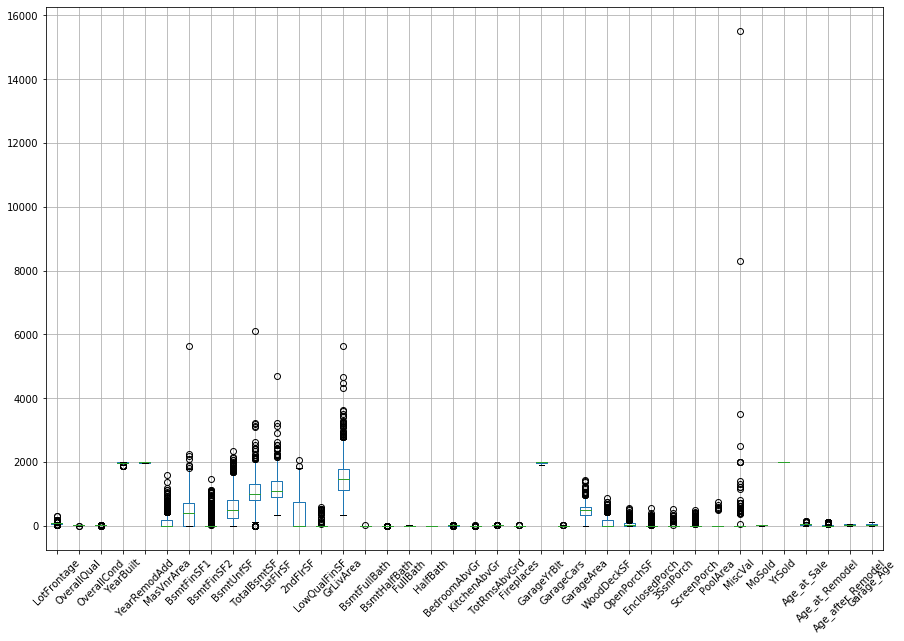

In [229]:
df_without_SalePrice = df_house.drop('SalePrice',axis=1)

df_without_SalePrice.drop('LotArea',axis=1).boxplot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

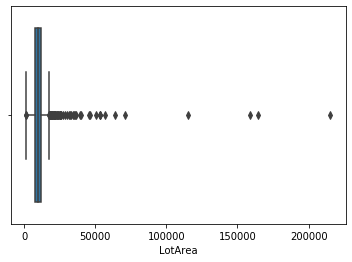

In [230]:
sns.boxplot(df_without_SalePrice['LotArea'])

* LotArea, MiscVal and GrLivArea have high range of Outliers
* I would majorly focus on these and see the effect on SalePrice first, then on LotFrontage

Shape of Outliers DF : (896, 85)


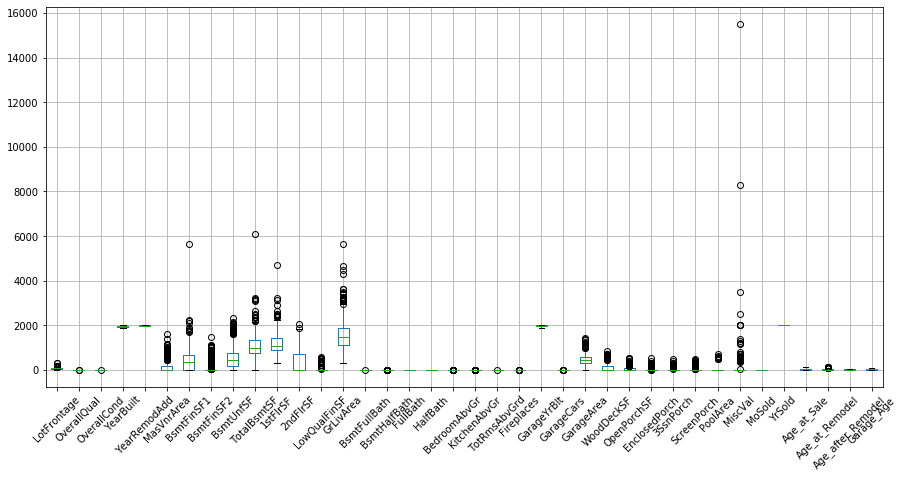

In [231]:
# Outlier Data Frame Analysis
q1 = df_house.quantile(0.25)
q3 = df_house.quantile(0.75)

IQR = q3-q1
UL = q3 + 1.5*IQR
LL = q1 - 1.5*IQR

# temp = df_house[~((df_house>LL)&(df_house<UL))]
temp = df_house[((df_house < LL) | (df_house > UL)).any(axis = 1)]

print('Shape of Outliers DF :',temp.shape)

temp.drop(['LotArea','SalePrice'],axis=1).boxplot(figsize=(15,7))
plt.xticks(rotation=45)
plt.show()

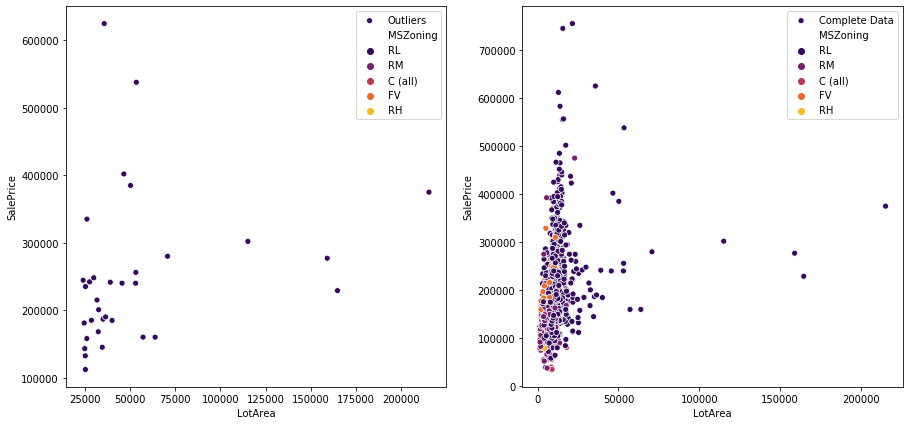

In [232]:
# LotArea Outliers v/s SalePrice
q1 = np.quantile(df_house['LotArea'],0.25)
q3 = np.quantile(df_house['LotArea'],0.75)
iqr = q3-q1
ul = q3 + 3*iqr
ll = q1 - 1.5*iqr

temp = df_house[df_house['LotArea']>ul]

# plt.figure(figsize=(10,5))
f,ax = plt.subplots(1,2,figsize=(15,7))
sns.scatterplot(temp['LotArea'],temp['SalePrice'],hue = df_house['MSZoning'],ax=ax[0],label = 'Outliers',palette='inferno')
sns.scatterplot(df_house['LotArea'],df_house['SalePrice'],hue = df_house['MSZoning'],ax=ax[1],label = 'Complete Data',palette='inferno')
plt.legend()
plt.show()

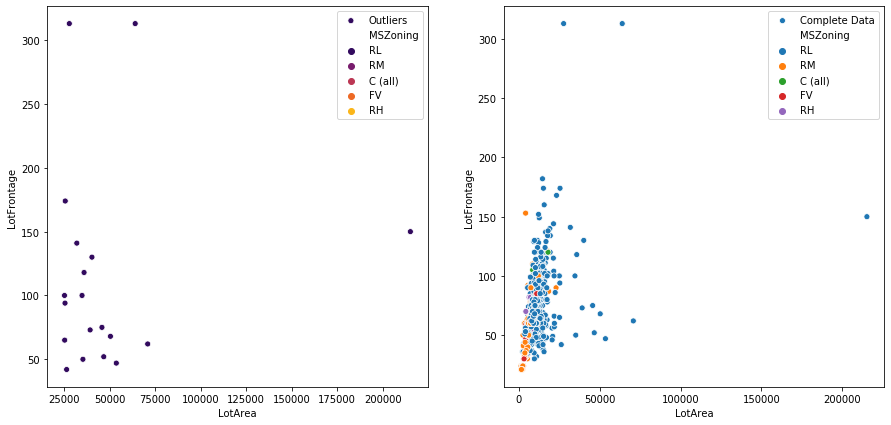

In [233]:
f,ax = plt.subplots(1,2,figsize=(15,7))
sns.scatterplot(temp['LotArea'],temp['LotFrontage'],hue = df_house['MSZoning'],ax=ax[0],label = 'Outliers',palette='inferno')
sns.scatterplot(df_house['LotArea'],df_house['LotFrontage'],hue = df_house['MSZoning'],ax=ax[1],label = 'Complete Data')
plt.legend()
plt.show()

In [242]:
# Lets impute the Values in LotFrontage for now based on the Median grouped basis ['MSZoning','Neighborhood','Street']
# * Later will revisit and recheck the imputation

df_house.LotFrontage = df_house.LotFrontage.fillna(df_house.groupby(['MSZoning', 'Neighborhood','Street'])['LotFrontage'].transform('median'))
miss = (df_house.isnull().sum()/df_house.shape[0])*100
miss.sort_values(ascending=False).head()

GarageYrBlt    5.547945
LotFrontage    0.068493
Garage_Age     0.000000
BsmtCond       0.000000
Exterior2nd    0.000000
dtype: float64

In [249]:
print(df_house[df_house.MSZoning=='RM'].groupby(['MSZoning'])['LotFrontage'].median(),'-- Missing Value Last Record')
df_house.LotFrontage.fillna(51,inplace=True)
miss = (df_house.isnull().sum()/df_house.shape[0])*100
miss.sort_values(ascending=False).head()

MSZoning
RM    51.0
Name: LotFrontage, dtype: float64 -- Missing Value Last Record


GarageYrBlt    5.547945
Garage_Age     0.000000
BsmtCond       0.000000
Exterior2nd    0.000000
MasVnrType     0.000000
dtype: float64

------------------------------

## Checking the Distribution

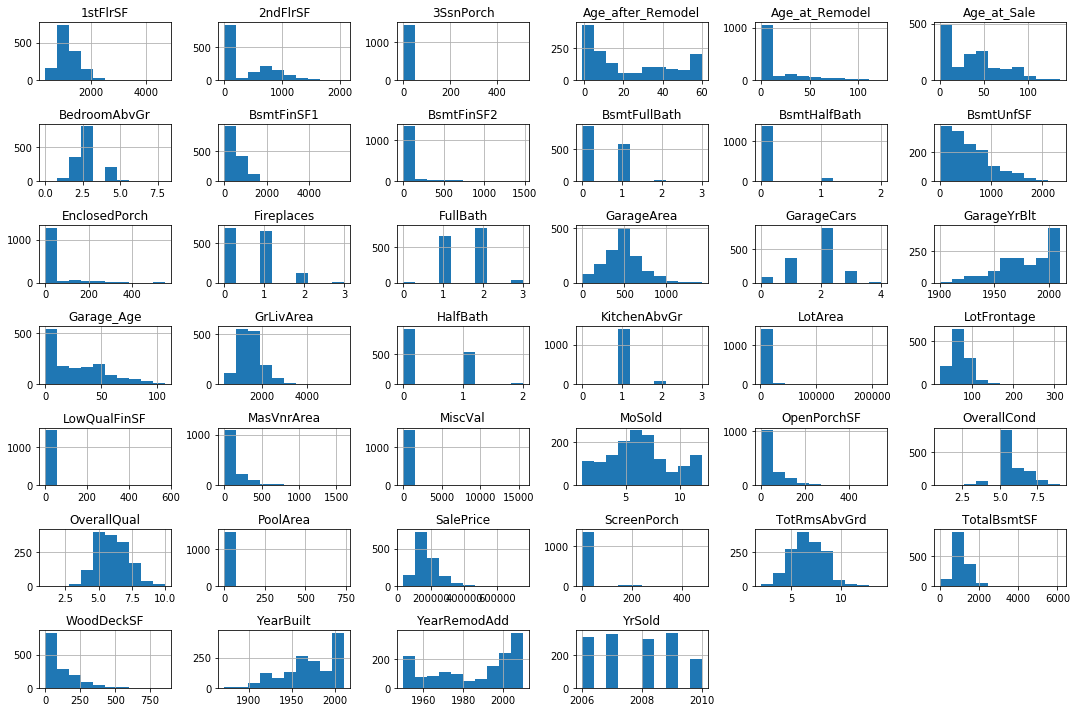

In [114]:
df_house.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

In [115]:

# df_house['Remodel'] = df_house['YearBuilt']==df_house['YearRemodAdd']
# df_house['Remodel'] = df_house['Remodel'].astype('object')
# df_house['Remodel'].map({'True' : 0,'False' : 1})
# df_house['YearBuilt']==df_house['YearRemodAdd']

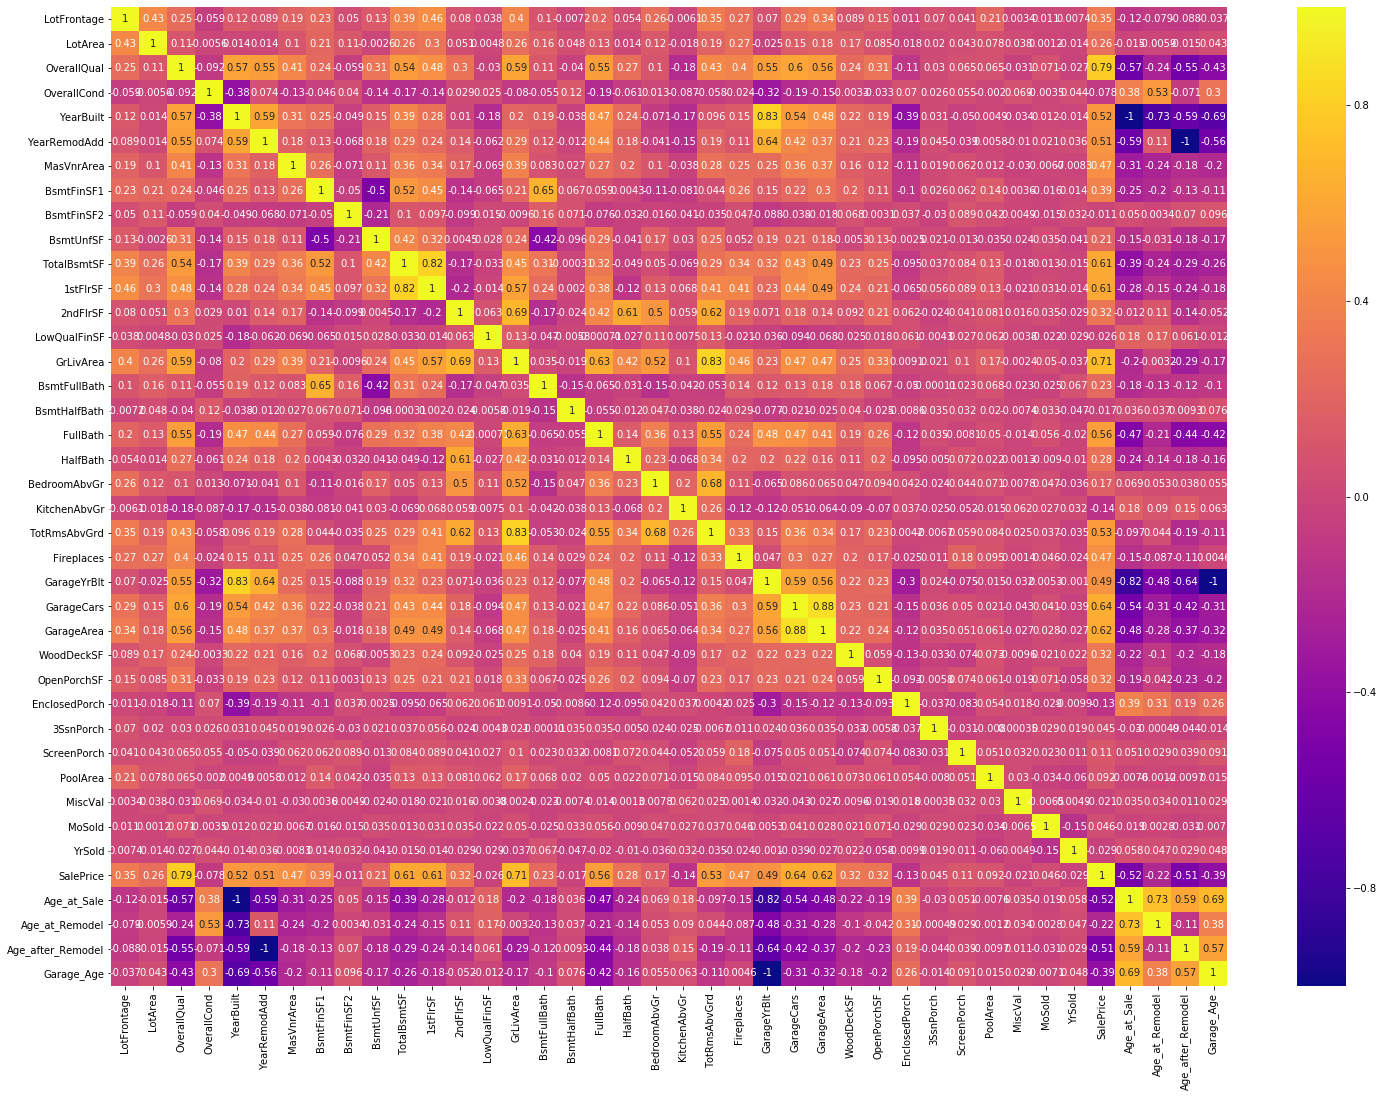

In [142]:
plt.figure(figsize=(25,18))
sns.heatmap(df_house.corr(),annot=True,cmap='plasma')
plt.show()

In [251]:
# Dropping the Redundant Columns
non_redundant_df = df_house.drop(['GarageYrBlt','YearBuilt','MoSold','YrSold','YearRemodAdd'],axis=1)
new_df = pd.get_dummies(non_redundant_df,drop_first=True)
new_df.shape

(1460, 283)

# Building Model

In [261]:
import statsmodels.api as sma
X = new_df.drop('SalePrice',axis=1)
X = sma.add_constant(X)
y = new_df.SalePrice

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)
Xtrain.shape,ytest.shape

((1168, 283), (292,))

In [262]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS

lrmodel = OLS(ytrain,Xtrain).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     53.86
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:05:28   Log-Likelihood:                -13149.
No. Observations:                1168   AIC:                         2.683e+04
Df Residuals:                     900   BIC:                         2.819e+04
Df Model:                         267                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.488e+06   3.08e+05     -8.069      0.000   -3.09e+06   -1.88e+06
LotFrontage                  5.7323     49.562      0.116      0.908     -91.539     103.003
LotArea                      0.7418      0.136      5.474      0.000       0.476       1.008
OverallQual               6771.2959   1130.750      5.988      0.000    4552.081    8990.511
OverallCond               5103.1989    947.724      5.385      0.000    3243.193    6963.205
MasVnrArea                  27.1125      6.781      3.998      0.000      13.805      40.420
BsmtFinSF1                  16.8205      3.191      5.272      0.000      10.558      23.083
BsmtFinSF2                   5.6866      6.524      0.872      0.384      -7.118      18.491
BsmtUnfSF                    0.1991      3.046      0.065      0.948      -5.780       6.178
TotalBsmtSF                 22.7062      4.369      5.197      0.000      14.132      31.280
1stFlrSF                     5.7072      7.758      0.736      0.462      -9.518      20.933
2ndFlrSF                    20.9185      6.406      3.265      0.001       8.346      33.491
LowQualFinSF                 7.1746     17.557      0.409      0.683     -27.282      41.632
GrLivArea                   33.8003      6.959      4.857      0.000      20.142      47.459
BsmtFullBath              2290.8302   2164.568      1.058      0.290   -1957.359    6539.019
BsmtHalfBath              -339.7966   3363.280     -0.101      0.920   -6940.580    6260.987
FullBath                  3462.0592   2437.618      1.420      0.156   -1322.018    8246.137
HalfBath                  1761.2181   2275.151      0.774      0.439   -2704.000    6226.436
BedroomAbvGr             -2432.5764   1553.061     -1.566      0.118   -5480.619     615.466
KitchenAbvGr             -1.089e+04   6591.239     -1.652      0.099   -2.38e+04    2047.219
TotRmsAbvGrd              1770.6228   1064.242      1.664      0.097    -318.062    3859.308
Fireplaces                4680.6827   2817.384      1.661      0.097    -848.724    1.02e+04
GarageCars                1452.2758   2522.655      0.576      0.565   -3498.696    6403.248
GarageArea                  30.3380      8.880      3.416      0.001      12.909      47.767
WoodDeckSF                  17.6339      6.347      2.778      0.006       5.178      30.090
OpenPorchSF                  0.3165     12.348      0.026      0.980     -23.917      24.550
EnclosedPorch               12.4782     13.955      0.894      0.371     -14.909      39.866
3SsnPorch                   48.1222     22.370      2.151      0.032       4.219      92.026
ScreenPorch                 41.2964     13.808      2.991      0.003      14.197      68.396
PoolArea                  6838.7935    997.266      6.858      0.000    4881.555    8796.032
MiscVal       

In [263]:
lrmodel.pvalues[lrmodel.pvalues<.05].index

Index(['const', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Age_at_Sale',
       'Age_after_Remodel', 'MSSubClass_90', 'Street_Pave', 'LandContour_HLS',
       'LotConfig_CulDSac', 'LandSlope_Sev', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_RRAn', 'Condition2_PosN',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Fin', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'ExterQual_Gd', 'ExterQual_TA',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev',
     

In [265]:
lrmodel.pvalues[lrmodel.pvalues>.05].index[:50]

Index(['LotFrontage', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'OpenPorchSF', 'EnclosedPorch', 'MiscVal', 'Age_at_Remodel',
       'Garage_Age', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_120', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Alley_No Alley', 'Alley_Pave',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_Blueste',
       'Neighborhood_BrDale'],
      dtype='object')

In [305]:
# Check the Categorical Significance individually
# This is the final set

#dropping insignificant variables
df_new_significant=df_house.drop(['MSSubClass','Neighborhood','Condition2','HouseStyle','Exterior1st',
                'LotFrontage', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF','BsmtFullBath','YearRemodAdd','MoSold',
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd','YearBuilt','YrSold',
                'Fireplaces', 'GarageCars','OpenPorchSF', 'EnclosedPorch', 'MiscVal', 'Age_at_Remodel','GarageYrBlt','Garage_Age'],axis=1)

tuned_df = pd.get_dummies(df_new_significant,drop_first=True)

X = tuned_df.drop('SalePrice',axis=1)
X = sma.add_constant(X)
y = tuned_df.SalePrice

nXtrain,nXtest,nytrain,nytest = train_test_split(X,y,test_size=0.2,random_state=42)
print(nXtrain.shape,nytrain.shape)
lr_tuned = OLS(nytrain,nXtrain).fit()
lr_tuned.summary()

(1168, 198) (1168,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     54.68
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:59:12   Log-Likelihood:                -13376.
No. Observations:                1168   AIC:                         2.713e+04
Df Residuals:                     979   BIC:                         2.809e+04
Df Model:                         188                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.481e+06   2.73e+05     -9.086      0.000   -3.02e+06   -1.94e+06
LotArea                      0.5285      0.142      3.716      0.000       0.249       0.808
OverallQual               8998.5323   1198.347      7.509      0.000    6646.907    1.14e+04
OverallCond               5074.2153   1032.301      4.915      0.000    3048.439    7099.992
MasVnrArea                  29.4960      7.173      4.112      0.000      15.420      43.572
BsmtFinSF1                  17.2173      3.279      5.250      0.000      10.782      23.652
TotalBsmtSF                 23.1327      5.324      4.345      0.000      12.685      33.580
2ndFlrSF                     4.6288      5.543      0.835      0.404      -6.248      15.506
GrLivArea                   46.1489      5.414      8.523      0.000      35.524      56.774
GarageArea                  32.7228      6.421      5.096      0.000      20.122      45.324
WoodDeckSF                  18.6657      6.918      2.698      0.007       5.089      32.242
3SsnPorch                   65.3432     25.175      2.596      0.010      15.940     114.746
ScreenPorch                 45.9562     15.302      3.003      0.003      15.928      75.985
PoolArea                  6802.4932    953.720      7.133      0.000    4930.922    8674.065
Age_at_Sale               -248.1770     76.121     -3.260      0.001    -397.556     -98.798
Age_after_Remodel         -102.5958     66.311     -1.547      0.122    -232.723      27.531
MSZoning_FV               3.806e+04   1.52e+04      2.504      0.012    8235.750    6.79e+04
MSZoning_RH               2.939e+04   1.56e+04      1.884      0.060   -1224.443       6e+04
MSZoning_RL               3.273e+04   1.45e+04      2.258      0.024    4288.633    6.12e+04
MSZoning_RM                2.41e+04   1.46e+04      1.652      0.099   -4534.579    5.27e+04
Street_Pave               1.484e+04   1.54e+04      0.967      0.334   -1.53e+04     4.5e+04
Alley_No Alley           -1605.9006   4725.048     -0.340      0.734   -1.09e+04    7666.488
Alley_Pave               -2460.9434   7175.380     -0.343      0.732   -1.65e+04    1.16e+04
LotShape_IR2              8526.2541   4852.179      1.757      0.079    -995.614     1.8e+04
LotShape_IR3              4836.7163    1.1e+04      0.441      0.659   -1.67e+04    2.64e+04
LotShape_Reg              1854.2939   1914.387      0.969      0.333   -1902.480    5611.068
LandContour_HLS           2.905e+04   6308.962      4.605      0.000    1.67e+04    4.14e+04
LandContour_Low           4887.5695   7957.467      0.614      0.539   -1.07e+04    2.05e+04
LandContour_Lvl           1.143e+04   4620.047      2.475      0.014    2366.794    2.05e+04
Utilities_NoSeWa         -4.434e+04   2.79e+04     -1.587      0.113   -9.92e+04    1.05e+04
LotConfig_CulD

In [306]:
print('Original Set Columns :',Xtrain.shape[1])
print('Tuned Set Columns :',nXtrain.shape[1])

Original Set Columns : 283
Tuned Set Columns : 198


In [307]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

lr_tuned_pred = lr_tuned.predict(nXtest)
print('MAPE of Regression Model :',mean_absolute_percentage_error(nytest,lr_tuned_pred))
print('\nRMSE of Regression Model :',np.sqrt(mean_squared_error(nytest,lr_tuned_pred)))

MAPE of Regression Model : 0.15686544423369655

RMSE of Regression Model : 93570.38611572482


In [308]:
df_new_significant.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

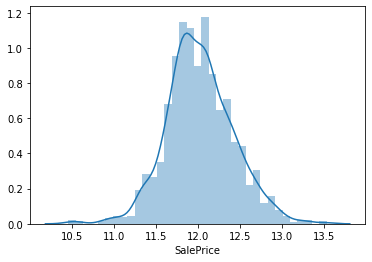

In [309]:
# Transformed Distribution of SalePrice
sns.distplot(np.log(df_new_significant.SalePrice))

In [310]:
# Building Model on the Transformed Sale Price

tuned_df = pd.get_dummies(df_new_significant,drop_first=True)

X = tuned_df.drop('SalePrice',axis=1)
X = sma.add_constant(X)
y = np.log(tuned_df.SalePrice)

nXtrain1,nXtest1,nytrain1,nytest1 = train_test_split(X,y,test_size=0.2,random_state=42)
print(nXtrain1.shape,nytrain1.shape)
lr_tuned = OLS(nytrain1,nXtrain1).fit()
lr_tuned.summary()

(1168, 198) (1168,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     63.57
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:59:13   Log-Likelihood:                 948.34
No. Observations:                1168   AIC:                            -1519.
Df Residuals:                     979   BIC:                            -561.8
Df Model:                         188                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.2212      1.288      5.606      0.000       4.694       9.749
LotArea                   1.445e-06   6.71e-07      2.153      0.032    1.28e-07    2.76e-06
OverallQual                  0.0525      0.006      9.287      0.000       0.041       0.064
OverallCond                  0.0364      0.005      7.484      0.000       0.027       0.046
MasVnrArea                3.709e-06   3.38e-05      0.110      0.913   -6.27e-05    7.01e-05
BsmtFinSF1                6.444e-05   1.55e-05      4.166      0.000    3.41e-05    9.48e-05
TotalBsmtSF               8.321e-05   2.51e-05      3.313      0.001    3.39e-05       0.000
2ndFlrSF                  -8.13e-06   2.61e-05     -0.311      0.756   -5.94e-05    4.32e-05
GrLivArea                    0.0003   2.55e-05     10.729      0.000       0.000       0.000
GarageArea                   0.0001   3.03e-05      4.680      0.000    8.23e-05       0.000
WoodDeckSF                6.794e-05   3.26e-05      2.082      0.038     3.9e-06       0.000
3SsnPorch                    0.0003      0.000      2.427      0.015    5.52e-05       0.001
ScreenPorch                  0.0003   7.22e-05      3.804      0.000       0.000       0.000
PoolArea                     0.0020      0.004      0.447      0.655      -0.007       0.011
Age_at_Sale                 -0.0015      0.000     -4.148      0.000      -0.002      -0.001
Age_after_Remodel           -0.0010      0.000     -3.313      0.001      -0.002      -0.000
MSZoning_FV                  0.3509      0.072      4.894      0.000       0.210       0.492
MSZoning_RH                  0.3285      0.074      4.464      0.000       0.184       0.473
MSZoning_RL                  0.3164      0.068      4.627      0.000       0.182       0.451
MSZoning_RM                  0.2389      0.069      3.471      0.001       0.104       0.374
Street_Pave                  0.0085      0.072      0.117      0.907      -0.134       0.151
Alley_No Alley              -0.0214      0.022     -0.962      0.336      -0.065       0.022
Alley_Pave                   0.0049      0.034      0.144      0.886      -0.062       0.071
LotShape_IR2                 0.0362      0.023      1.583      0.114      -0.009       0.081
LotShape_IR3                 0.0199      0.052      0.384      0.701      -0.082       0.121
LotShape_Reg                 0.0007      0.009      0.073      0.942      -0.017       0.018
LandContour_HLS              0.1168      0.030      3.925      0.000       0.058       0.175
LandContour_Low              0.0562      0.038      1.497      0.135      -0.017       0.130
LandContour_Lvl              0.0566      0.022      2.598      0.010       0.014       0.099
Utilities_NoSeWa            -0.1514      0.132     -1.148      0.251      -0.410       0.107
LotConfig_CulD

In [311]:
lr_tuned_pred1 = lr_tuned.predict(nXtest1)
print('MAPE of Regression Model :',mean_absolute_percentage_error(np.exp(nytest1),np.exp(lr_tuned_pred1)))
print('\nRMSE of Regression Model :',np.sqrt(mean_squared_error(np.exp(nytest1),np.exp(lr_tuned_pred1))))

MAPE of Regression Model : 0.10043698217261482

RMSE of Regression Model : 28052.626028062954


### Inference :

    * Post Transformation, MAPE has fallen from 15% to 10%
    * Also, RMSE has reduced from ~93000 to ~28000

In [317]:
cat_cols = df_new_significant.select_dtypes('object').columns
num_cols = df_new_significant.select_dtypes(np.number).columns

for i in cat_cols:
    print('{}\n{}\n\n'.format(i,df_new_significant[i].value_counts()))

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Street
Pave    1454
Grvl       6
Name: Street, dtype: int64


Alley
No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64


LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtyp

Further Changes:
    * ['Street','Utilities'] --> Homogeneous
    * ['Alley' , 'Exterior2nd','ExterQual','ExterCond','BsmtFinType1','BsmtFinType2','Foundation','GarageType','GarageCond',
    'GarageQual','GarageFinish','MasVnrType','FireplaceQu','Fence'] --> Not Affecting my model / Insignificant
    * RoofStyle - Gable/Hip/Others
    * RoofMatl - CompShg/Others

In [324]:
def roofstyle_changer(x):
    if x=='Gable':
        return x
    elif x == 'Hip':
        return x
    else:
        return 'Others'
    
def roofmaterial_changer(x):
    if x=='CompShg':
        return x
    else:
        return 'Others'
    
df_new_significant.RoofStyle = df_new_significant.RoofStyle.apply(roofstyle_changer)
df_new_significant.RoofMatl = df_new_significant.RoofMatl.apply(roofmaterial_changer)

In [332]:
# Alley and Exterior2nd are not Significant according to the Model Summary
final_df_tuned = df_new_significant.drop(['Street','Utilities','Alley' , 'Exterior2nd','ExterQual','ExterCond','BsmtFinType1',
                                          'Month_Sold','MasVnrType','FireplaceQu','Fence',
                                          'BsmtFinType2','Foundation','GarageType','GarageCond','GarageQual','GarageFinish'],axis=1)

X = final_df_tuned.drop('SalePrice',axis=1)
X = sma.add_constant(X)
y = np.log(final_df_tuned.SalePrice)

fXtrain,fXtest,fytrain,fytest = train_test_split(pd.get_dummies(X,drop_first=True),y,test_size=0.2,random_state=42)

print('Final Columns :',fXtrain.shape[1])

final_lr = OLS(fytrain,fXtrain).fit()
final_lr.summary()

Final Columns : 104


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     113.6
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:43:38   Log-Likelihood:                 874.72
No. Observations:                1168   AIC:                            -1547.
Df Residuals:                    1067   BIC:                            -1036.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.4462      0.478      9.304      0.000       3.509       5.384
LotArea                   1.241e-06   5.68e-07      2.185      0.029    1.27e-07    2.36e-06
OverallQual                  0.0639      0.005     12.470      0.000       0.054       0.074
OverallCond                  0.0338      0.004      7.689      0.000       0.025       0.042
MasVnrArea                3.011e-06   2.57e-05      0.117      0.907   -4.74e-05    5.34e-05
BsmtFinSF1                7.454e-05   1.02e-05      7.330      0.000    5.46e-05    9.45e-05
TotalBsmtSF                8.51e-05   2.28e-05      3.732      0.000    4.04e-05       0.000
2ndFlrSF                 -1.864e-05   2.36e-05     -0.790      0.430   -6.49e-05    2.77e-05
GrLivArea                    0.0003    2.3e-05     12.520      0.000       0.000       0.000
GarageArea                   0.0002   2.41e-05      7.735      0.000       0.000       0.000
WoodDeckSF                7.024e-05   3.13e-05      2.243      0.025    8.78e-06       0.000
3SsnPorch                    0.0002      0.000      2.006      0.045    4.98e-06       0.000
ScreenPorch                  0.0003    6.9e-05      4.283      0.000       0.000       0.000
PoolArea                     0.0106      0.001     13.434      0.000       0.009       0.012
Age_at_Sale                 -0.0013      0.000     -4.769      0.000      -0.002      -0.001
Age_after_Remodel           -0.0009      0.000     -3.015      0.003      -0.001      -0.000
MSZoning_FV                  0.3600      0.068      5.320      0.000       0.227       0.493
MSZoning_RH                  0.3224      0.071      4.528      0.000       0.183       0.462
MSZoning_RL                  0.3241      0.065      4.990      0.000       0.197       0.451
MSZoning_RM                  0.2464      0.065      3.785      0.000       0.119       0.374
LotShape_IR2                 0.0415      0.022      1.874      0.061      -0.002       0.085
LotShape_IR3                 0.0185      0.051      0.364      0.716      -0.081       0.118
LotShape_Reg                -0.0047      0.009     -0.535      0.593      -0.022       0.013
LandContour_HLS              0.1080      0.029      3.748      0.000       0.051       0.164
LandContour_Low              0.0379      0.035      1.074      0.283      -0.031       0.107
LandContour_Lvl              0.0490      0.021      2.361      0.018       0.008       0.090
LotConfig_CulDSac            0.0230      0.017      1.358      0.175      -0.010       0.056
LotConfig_FR2               -0.0292      0.022     -1.309      0.191      -0.073       0.015
LotConfig_FR3               -0.0245      0.074     -0.333      0.740      -0.169       0.120
LotConfig_Inside            -0.0090      0.010     -0.940      0.347      -0.028       0.010
LandSlope_Mod 

In [333]:
final_pred = final_lr.predict(fXtest)
print('MAPE of Regression Model :',mean_absolute_percentage_error(np.exp(fytest),np.exp(final_pred)))
print('\nRMSE of Regression Model :',np.sqrt(mean_squared_error(np.exp(fytest),np.exp(final_pred))))

MAPE of Regression Model : 0.10069082567818224

RMSE of Regression Model : 26417.222510459782


In [355]:
# Lets Treat the Multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# new_X = pd.get_dummies(final_df_tuned.drop('SalePrice',axis=1))

temp = final_df_tuned.drop(['SalePrice','GrLivArea','OverallQual','OverallCond','TotalBsmtSF'],axis=1)
new_X = temp.select_dtypes(np.number)

vif = []

for i in range(new_X.shape[1]):
    vif.append(variance_inflation_factor(new_X.values,i))
    
# pd.DataFrame(vif,columns=new_X.columns).sort_values()
VIF_df = pd.DataFrame({"Features":new_X.columns,'VIF':vif}).sort_values('VIF',ascending=False)
VIF_df

,Features,VIF
4,GarageArea,4.276450
9,Age_at_Sale,3.701504
10,Age_after_Remodel,3.401052
2,BsmtFinSF1,2.432504
0,LotArea,2.314674
3,2ndFlrSF,1.825426
5,WoodDeckSF,1.753477
1,MasVnrArea,1.686997
7,ScreenPorch,1.105138
8,PoolArea,1.037745


In [358]:
X = pd.get_dummies(temp,drop_first=True)
X = sma.add_constant(X)
y = np.log(final_df_tuned.SalePrice)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

MODEL = OLS(ytrain,Xtrain).fit()
MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     54.83
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:58:13   Log-Likelihood:                 479.16
No. Observations:                1168   AIC:                            -764.3
Df Residuals:                    1071   BIC:                            -273.2
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.2576      0.638     11.375      0.000       6.006       8.510
LotArea                   4.149e-06   7.78e-07      5.335      0.000    2.62e-06    5.68e-06
MasVnrArea                   0.0002   3.52e-05      4.662      0.000    9.49e-05       0.000
BsmtFinSF1                   0.0001   1.38e-05      7.408      0.000    7.54e-05       0.000
2ndFlrSF                     0.0002   1.33e-05     14.461      0.000       0.000       0.000
GarageArea                   0.0004   3.23e-05     12.100      0.000       0.000       0.000
WoodDeckSF                   0.0002   4.35e-05      3.702      0.000    7.57e-05       0.000
3SsnPorch                    0.0004      0.000      2.380      0.017     6.7e-05       0.001
ScreenPorch                  0.0005   9.63e-05      4.938      0.000       0.000       0.001
PoolArea                     0.0078      0.001      7.350      0.000       0.006       0.010
Age_at_Sale                 -0.0001      0.000     -0.378      0.706      -0.001       0.001
Age_after_Remodel           -0.0020      0.000     -5.210      0.000      -0.003      -0.001
MSZoning_FV                  0.3811      0.094      4.036      0.000       0.196       0.566
MSZoning_RH                  0.3984      0.099      4.005      0.000       0.203       0.594
MSZoning_RL                  0.3838      0.091      4.232      0.000       0.206       0.562
MSZoning_RM                  0.2740      0.091      3.015      0.003       0.096       0.452
LotShape_IR2                 0.0303      0.031      0.978      0.328      -0.030       0.091
LotShape_IR3                -0.0389      0.071     -0.548      0.584      -0.178       0.100
LotShape_Reg                -0.0099      0.012     -0.803      0.422      -0.034       0.014
LandContour_HLS              0.0632      0.040      1.577      0.115      -0.015       0.142
LandContour_Low             -0.0735      0.049     -1.511      0.131      -0.169       0.022
LandContour_Lvl              0.0052      0.029      0.181      0.856      -0.051       0.062
LotConfig_CulDSac            0.0241      0.024      1.016      0.310      -0.022       0.071
LotConfig_FR2               -0.0569      0.031     -1.824      0.068      -0.118       0.004
LotConfig_FR3                0.0566      0.103      0.549      0.583      -0.146       0.259
LotConfig_Inside            -0.0028      0.013     -0.211      0.833      -0.029       0.024
LandSlope_Mod               -0.0197      0.030     -0.653      0.514      -0.079       0.039
LandSlope_Sev               -0.1520      0.094     -1.614      0.107      -0.337       0.033
Condition1_Feedr             0.0268      0.036      0.747      0.455      -0.044       0.097
Condition1_Norm              0.0716      0.029      2.431      0.015       0.014       0.129
Condition1_Pos

In [359]:
pred = MODEL.predict(Xtest)
print('MAPE of Regression Model :',mean_absolute_percentage_error(np.exp(ytest),np.exp(pred)))
print('\nRMSE of Regression Model :',np.sqrt(mean_squared_error(np.exp(ytest),np.exp(pred))))

MAPE of Regression Model : 0.13738409465097723

RMSE of Regression Model : 36086.63018056596


##### Achievement for Linear Regression Model which makes sense(Interpretable)

------------------------------------------------------